In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math
from machine_learning.utiles_func import *
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

        Sepal Length
        Sepal Width
        Petal Length
        Petal Width
Using above 4 features you will clasify a flower in one of the three categories,

Setosa
Versicolour
Virginica

In [16]:
"""
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
"""

%matplotlib inline
import matplotlib.pyplot as plt
iris = datasets.load_iris()

"""Attribute Information:
        -> sepal length in cm
        -> sepal width in cm
        -> petal length in cm
        -> petal width in cm
   -> class: 
                Iris Setosa
                Iris Versicolour
                Iris Virginica

Number of Instances: 150 

Summary Statistics:
             Min  Max   Mean    SD   Class Correlation
   sepal length: 4.3  7.9   5.84  0.83    0.7826   
    sepal width: 2.0  4.4   3.05  0.43   -0.4194
   petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
    petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)

Class Distribution: 33.3% for each of 3 classes."""

In [18]:
iris.data[:,:].shape

(150, 4)

In [28]:
iris.target.shape

(150,)

In [ ]:
pd.DataFrame(iris.data).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<function matplotlib.pyplot.show(close=None, block=None)>

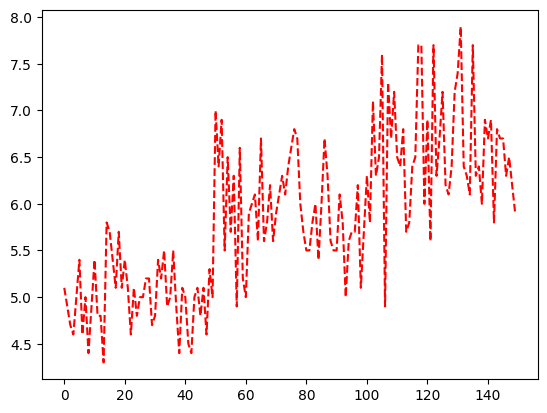

In [ ]:
# SepalLengthCm distrib
plt.plot(pd.DataFrame(iris.data).index, pd.DataFrame(iris.data)[0], "r--") 
plt.show 

Text(0, 0.5, '')

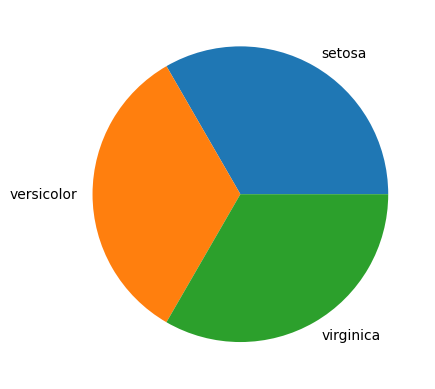

In [45]:
pd.Series([iris.target_names[i] for i in iris.target]).value_counts().plot.pie()
plt.ylabel('')

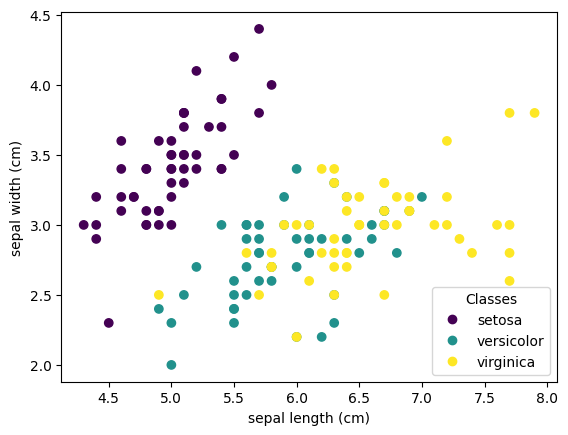

In [46]:
# let's plot a scatter to visualize data points (2D)
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [49]:
X = iris.data
y = iris.target

model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# measure acc of our model
model.score(X_test, y_test)

0.9666666666666667

Text(95.72222222222221, 0.5, 'Truth')

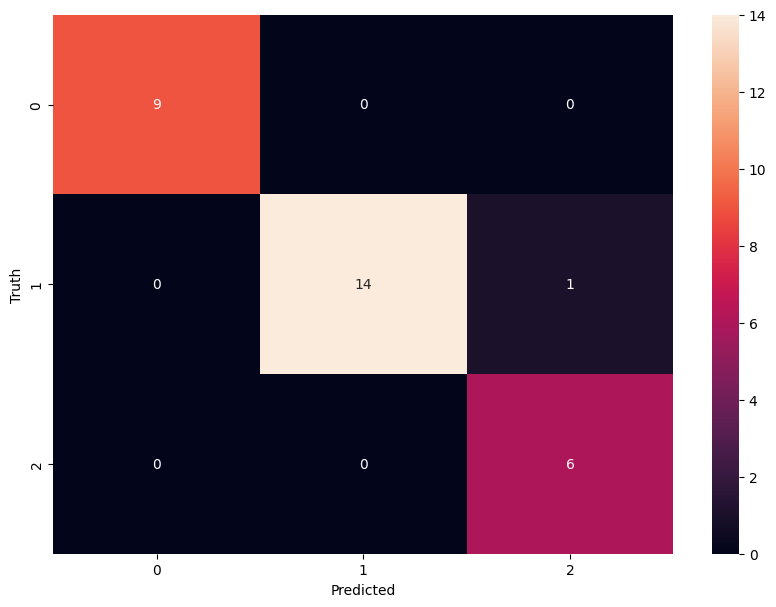

In [59]:
# get confusion matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')